<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #2. <br> Visual data analysis in Python: EDA of US flights <br> (using Pandas, Matplotlib & Seaborn & Plotly)

<img src='../../img/flight.png' width=50%>


* **Your task** is to write code and perform computations in the cells below

* **Deadline for A2**: 2020 April 07, 23:59 PM

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

* Download the data [archive](http://www.rdatasciencecases.org/Data/Airline/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.str}

In [4]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 1min 11s


**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [6]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            object 
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(7), object(5), uint16(3), uint8(4)
memory usage: 427.8+ MB


**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0
CarrierDelay,1524735.0,NaN,NaN,0.0,0.0,0.0,16.0,2436.0


**Count unique Carriers and plot their relative share of flights:**

In [10]:
flights_df['UniqueCarrier'].nunique()

20

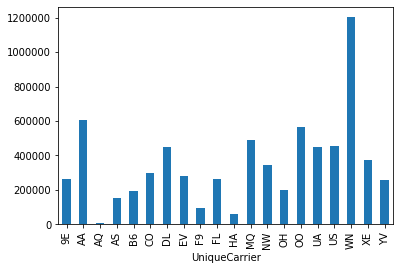

In [11]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [13]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

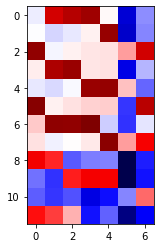

In [15]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

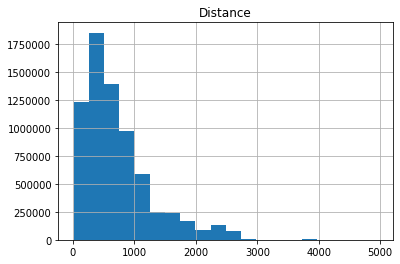

In [16]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [17]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [18]:
num_flights_by_date = flights_df.groupby('Date').size()

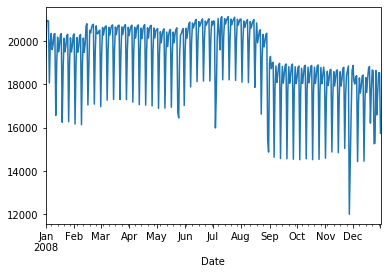

In [19]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

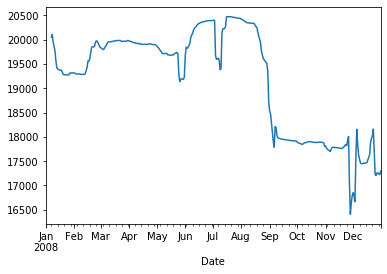

In [20]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

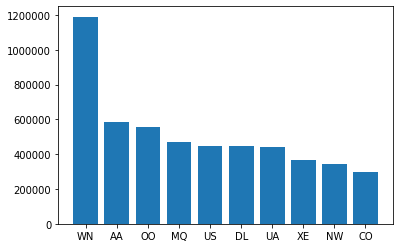

Carrier not in top 10: EV


In [21]:
top_10 = flights_df.loc[flights_df['Cancelled']==0,'UniqueCarrier'].value_counts()[0:10].reset_index()
top_10.columns = ['Carrier_name', 'flight_count']
plt.bar(top_10['Carrier_name'], top_10['flight_count'])
plt.show()
to_check = np.array(['DL','AA','OO','EV'])
print("Carrier not in top 10:",np.setdiff1d(to_check,top_10['Carrier_name'])[0])

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

Most Frequent reason for flight cancelation is weather


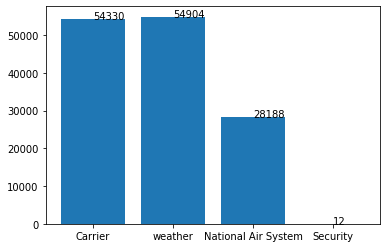

In [23]:
groupedvalues = flights_df.groupby('CancellationCode').count()[['Year']]
groupedvalues.columns = ['Count']
groupedvalues.index = ['Carrier','weather', 'National Air System', 'Security']
groupedvalues
plt.bar(x= groupedvalues.index, height = groupedvalues.Count)
for index, value in enumerate(groupedvalues['Count'].to_list()):
    plt.text(x= index, y = value, s = str(value), size = 10)
print('Most Frequent reason for flight cancelation is', groupedvalues.idxmax(axis = 0)[0])

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

Most Frequent reason for flight cancelation is SFO-LAX


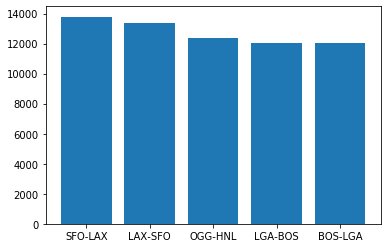

In [33]:
flights_df['route'] = flights_df['Origin'] +'-'+ flights_df['Dest']

groupedvalues = flights_df['route'].value_counts()[0:5].reset_index()
groupedvalues.columns = ['route','Count']
groupedvalues

plt.bar(x= groupedvalues.route, height = groupedvalues.Count)
print('Most Frequent reason for flight cancelation is', groupedvalues.route[groupedvalues['Count'].idxmax(axis = 0)])

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [35]:

flights_df['route'] = flights_df['Origin'] +'-'+ flights_df['Dest']
flights_df['DepDelay_flag'] = np.where(flights_df['DepDelay']>0,1,0)
flights_df['WeatherDelay_flag'] = np.where(flights_df['WeatherDelay']>0,1,0)
top_5_Dep_delayed_routes = flights_df.loc[flights_df['DepDelay_flag']==1,'route'].value_counts()[0:5]

flights_delay_whether = flights_df.loc[(flights_df['DepDelay_flag']==1) & (flights_df['route'].isin(top_5_Dep_delayed_routes.index)),'WeatherDelay_flag'].value_counts()
print('Number of flights delayed due to whether conditions on most delayed routes is:', flights_delay_whether[1])

Number of flights delayed due to whether conditions on most delayed routes is: 668


**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

-In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.
-Flights are uniformly distributed within time interval [6-19].


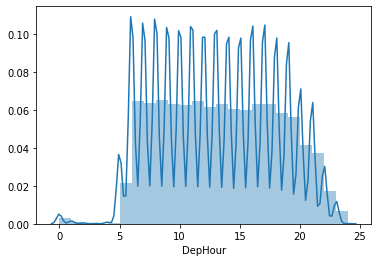

In [40]:
#%%5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.
flights_df['DepHour'] = flights_df['DepTime'].str[:-2]
flights_df['DepHour'] = np.where(flights_df["DepHour"]=='', 0, flights_df["DepHour"])
sns.distplot(flights_df.DepHour, bins=24)

print("-In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.")
print("-Flights are uniformly distributed within time interval [6-19].")

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

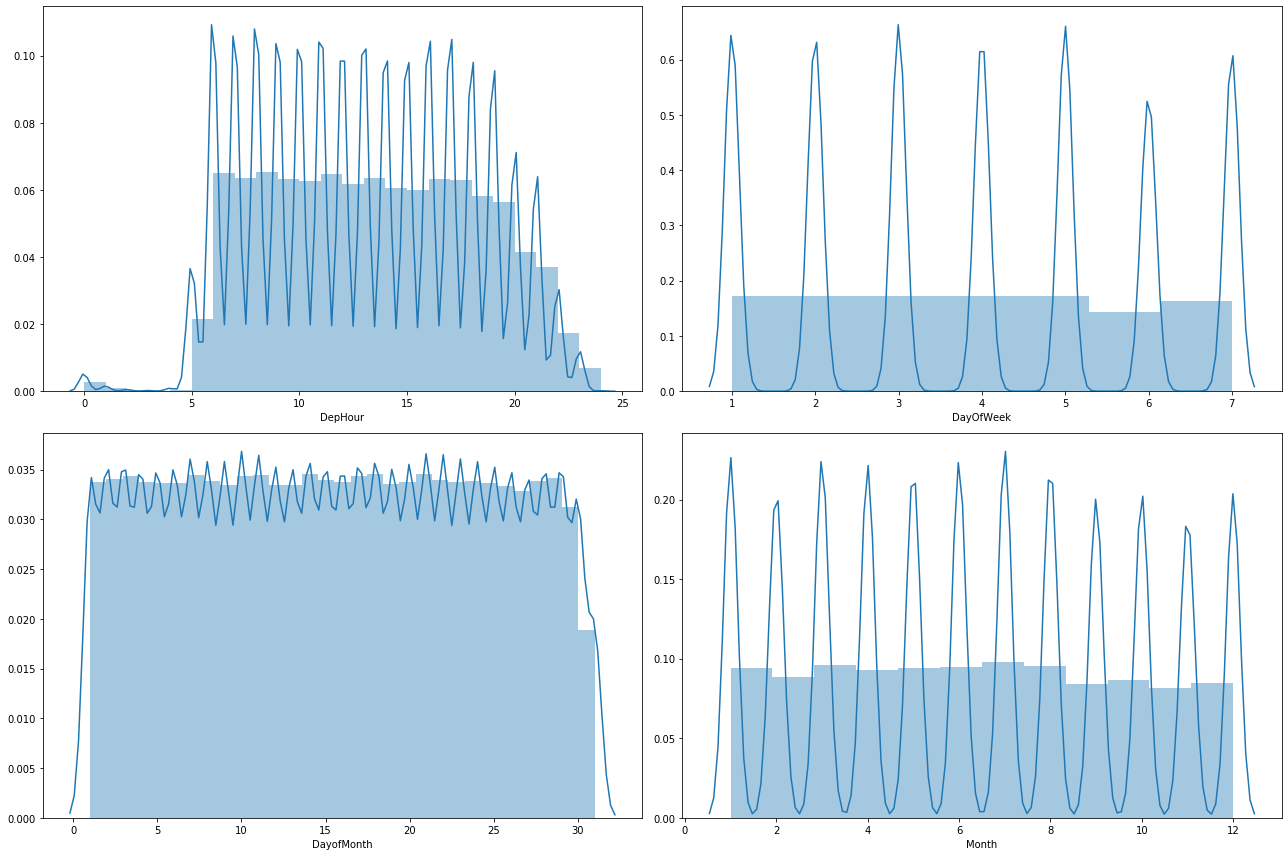

In [41]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.distplot(flights_df.DepHour, bins=24)

plt.subplot(2, 2, 2)
sns.distplot(flights_df.DayOfWeek, bins=7)

plt.subplot(2, 2, 3)
sns.distplot(flights_df.DayofMonth, bins=31)

plt.subplot(2, 2, 4)
sns.distplot(flights_df.Month, bins=12)

plt.tight_layout()

**Observations.
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Saturday.
- There are less flights during last quarter. 

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

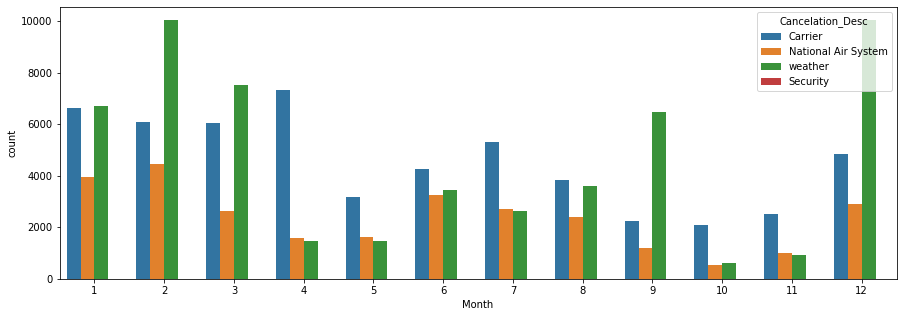

In [59]:
cancelation_Desc_df = pd.DataFrame({'CancellationCode':['A','B','C','D'],
                       'Cancelation_Desc':['Carrier','weather', 'National Air System', 'Security']},
                                   columns = ['CancellationCode', 'Cancelation_Desc'])
flights_df = flights_df.merge(cancelation_Desc_df, how = 'left')
groupedvalues = flights_df.groupby(['Month','Cancelation_Desc']).agg('count')['Year'].reset_index()
plt.figure(figsize=(15, 5))
sns.countplot(x='Month', hue='Cancelation_Desc', data=flights_df);

**Observations.

- December has the highest rate of cancellations due to weather - True
- The highest rate of cancellations in September is due to Security reasons - False (In Sep, whether causes most cancellations).
- April's top cancellation reason is carriers - True
- Flights cancellations due to National Air System are more frequent than those due to carriers. False


**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

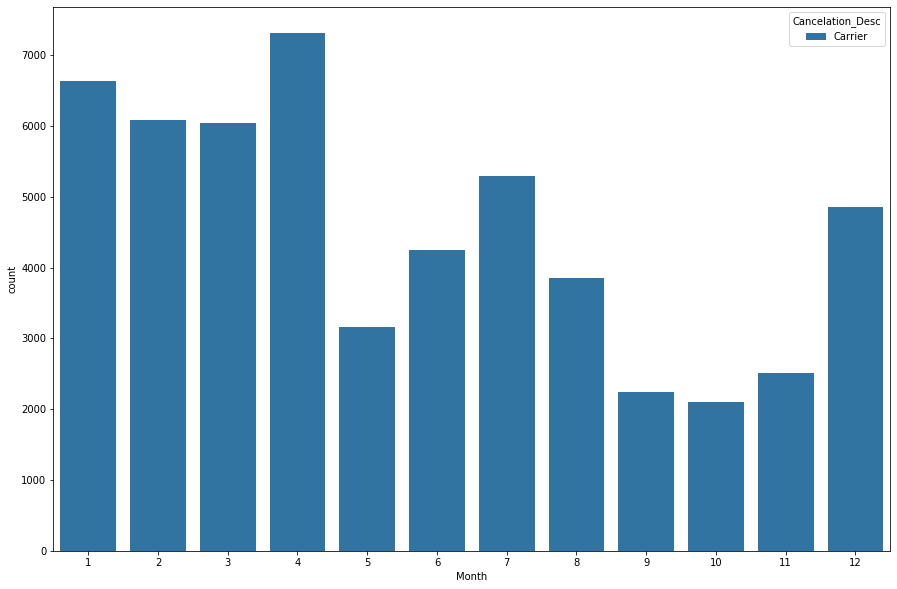

In [44]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Month', hue='Cancelation_Desc', data=flights_df[flights_df['Cancelation_Desc']== 'Carrier'])


``April`` has highest number of cancellations due to the ``Carrier`` 

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

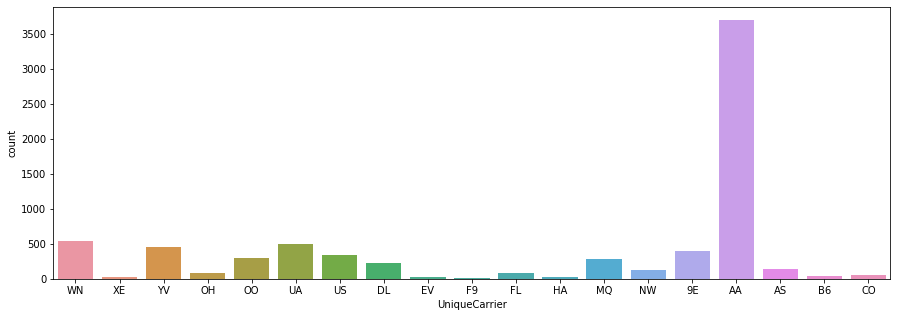

In [45]:
april_cancelations = flights_df.loc[(flights_df['Cancelation_Desc']== 'Carrier') & (flights_df['Month']==4),]

plt.figure(figsize=(15, 5))
sns.countplot(x='UniqueCarrier', data=april_cancelations);


Carrier ``AA`` has the highest number of Carrier cancellations in ``April``

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [ ]:
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

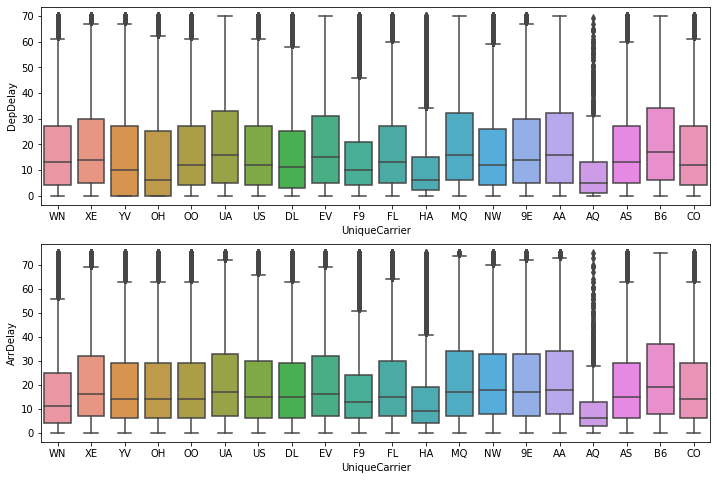

In [63]:
non_neg_flights_df = flights_df[(flights_df['DepDelay']>=0) & (flights_df['ArrDelay']>=0)]

# removing the outliers
non_neg_flights_df_noOut = non_neg_flights_df.loc[(flights_df['DepDelay']<=flights_df['DepDelay'].quantile(q = 0.95)) & 
                                    (flights_df['ArrDelay']<=flights_df['ArrDelay'].quantile(q = 0.95)),]
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(y='DepDelay', x='UniqueCarrier', data=non_neg_flights_df_noOut, orient='V')

plt.subplot(2, 1, 2)
sns.boxplot(y='ArrDelay', x='UniqueCarrier', data=non_neg_flights_df_noOut, orient='V')

Carrier ``AQ`` has the lowest median delay time for both arrivals and departures.